<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_10_Metrics_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import sklearn.metrics as skm

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

# Accuracy, Precision, Recall, F1

In [ ]:
# Rune some experiments
N = 50

# Number of experiment repetition
numExp = 10000

# Initialize
accuracy = np.zeros(numExp)
precision = np.zeros(numExp)
recall = np.zeros(numExp)
F1Score = np.zeros(numExp)

# Run the experiment
for expi in range(numExp):

    # Generate the data
    TP = np.random.randint(1,N)  # True Positives
    FN = N - TP                  # False Negatives
    TN = np.random.randint(1,N)  # True Negatives
    FP = N - TN                  # False Positives

    # Accuracy
    accuracy[expi] = (TP+TN)/(2*N)

    # Precision
    precision[expi] = TP/(TP+FP)

    # Recall
    recall[expi] = TP/(TP+FN)

    # F1Score
    F1Score[expi] = TP/(TP+(FP+FN)/2)

In [ ]:
# Plot
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(accuracy,F1Score,s=5,c=precision) # S = dot size
ax[0].plot([0,1],[0.5,0.5], "k--", linewidth=0.5)
ax[0].plot([0.5,0.5],[0,1], "k--", linewidth=0.5)
ax[0].set_xlabel("Accuracy")
ax[0].set_ylabel("F1 Score")
ax[0].set_title("F1-Accuracy by Precision")

ax[1].scatter(accuracy,F1Score,s=5,c=recall)
ax[1].plot([0,1],[0.5,0.5], "k--", linewidth=0.5)
ax[1].plot([0.5,0.5],[0,1], "k--", linewidth=0.5)
ax[1].set_xlabel("Accuracy")
ax[1].set_ylabel("F1 Score")
ax[1].set_title("F1-Accuracy by Recall")

plt.show()

# Application: Wine Quality

In [ ]:
# Download the data from original database
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Remove the extreme outliers as was done before
data = data[data["total sulfur dioxide"]<200]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Normalize all columns except quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5


In [ ]:
# Create a new binarized column for quality
data["boolQuality"] = 0
data["boolQuality"][data["quality"]>5] = 1
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolQuality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0


In [ ]:
# Convert from Pandas to tensors
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["boolQuality"].values).float()
# TRansform labels to matrix
labels = labels[:,None]

# Use sikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size=0.1)

# Convert to Pytorch Datasets
train_dataD = TensorDataset(train_data, train_labels)
test_dataD = TensorDataset(test_data, test_labels)

# Create the data loader objects
train_loader = DataLoader(train_dataD, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataD, batch_size=test_dataD.tensors[0].shape[0])

In [ ]:
# Create model Class
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        # Input Layer
        self.input = nn.Linear(11,16)

        # Two hidden layers
        self.fc1 = nn.Linear(16,32)
        self.fc2 = nn.Linear(32,32)

        # Output Layer
        self.output = nn.Linear(32,1)

    # Forward Pass
    def forward(self,x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.output(x)
# We want the raw output for using sikit learn for calculating the metrics

In [ ]:
# Define a function to train the model

# Define the number of trianing epoch
numepochs = 1000

def trainTheModel():

    # Define loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(winenet.parameters(),lr=0.01)

    # Initialize the losses
    losses = torch.zeros((numepochs,2))
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # Define batch loss and accuracy
        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward pass and loss
            yHat = winenet(X)
            loss = lossfun(yHat,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this particular batch
            batchLoss.append(loss.item())

            # Training accuracy of the batch
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        # End of the batch loop

        # Training accuracy for the epoch
        trainAcc.append(np.mean(batchAcc))

        # Training losses for the epoch
        losses[epochi,0] = np.mean(batchLoss)

        # Test
        X,y = next(iter(test_loader))
        with torch.no_grad():
            yHat = winenet(X)
        
        # Test Accuracy and losses
        testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        losses[epochi,1] = lossfun(yHat,y).item()
    # End of epoch
    # Return everything at the end
    return trainAcc, testAcc, losses

In [ ]:
# train the model
# Call a model instance
winenet = ANNwine()
trainAcc, testAcc, losses = trainTheModel()

In [ ]:
# Compute performance measures on train and test data
train_predictions = winenet(train_loader.dataset.tensors[0])

test_predictions = winenet(test_loader.dataset.tensors[0])

In [ ]:
train_predictions.shape

torch.Size([1437, 1])

In [ ]:
test_predictions.shape

torch.Size([160, 1])

In [ ]:
# use sikitlearn to compute the measures
# Initialize the vectors
train_metrics = [0,0,0,0]
test_metrics = [0,0,0,0]

# training scores (target value label, model predictions (raw output))
# if we used softmax, then instead of zero we would need 0.5
train_metrics[0] = skm.accuracy_score(train_loader.dataset.tensors[1],train_predictions>0)
train_metrics[1] = skm.precision_score(train_loader.dataset.tensors[1],train_predictions>0)
train_metrics[2] = skm.recall_score(train_loader.dataset.tensors[1],train_predictions>0)
train_metrics[3] = skm.f1_score(train_loader.dataset.tensors[1],train_predictions>0)

# test scores
test_metrics[0] = skm.accuracy_score(test_loader.dataset.tensors[1],test_predictions>0)
test_metrics[1] = skm.precision_score(test_loader.dataset.tensors[1],test_predictions>0)
test_metrics[2] = skm.recall_score(test_loader.dataset.tensors[1],test_predictions>0)
test_metrics[3] = skm.f1_score(test_loader.dataset.tensors[1],test_predictions>0)

In [ ]:
print(train_metrics)
print()
print(test_metrics)

[0.8921363952679193, 0.8751529987760098, 0.9309895833333334, 0.9022082018927444]

[0.8, 0.7849462365591398, 0.8588235294117647, 0.8202247191011236]


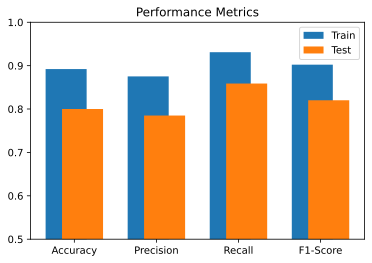

In [ ]:
# Plot them
plt.bar(np.arange(4)-0.1, train_metrics, 0.5)
plt.bar(np.arange(4)+0.1, test_metrics, 0.5)
plt.xticks([0,1,2,3], ["Accuracy", "Precision", "Recall", "F1-Score"])
plt.legend(["Train", "Test"])
plt.ylim([0.5,1.0])
plt.title("Performance Metrics")
plt.show()

In [ ]:
# Confusion Matrix
trainConf = skm.confusion_matrix(train_loader.dataset.tensors[1],train_predictions>0)
testConf  = skm.confusion_matrix(test_loader.dataset.tensors[1], test_predictions>0)

print(trainConf)
print()
print(testConf)

[[567 102]
 [ 53 715]]

[[55 20]
 [12 73]]


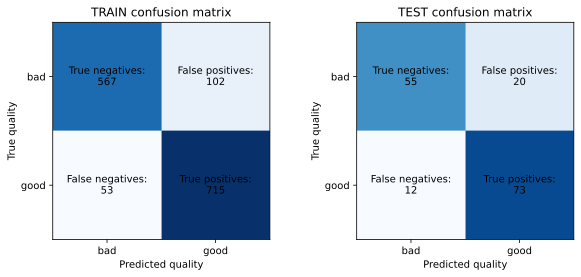

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

# confmat during TRAIN
ax[0].imshow(trainConf,'Blues',vmax=len(train_predictions)/2)
ax[0].set_xticks([0,1])
ax[0].set_yticks([0,1])
ax[0].set_xticklabels(['bad','good'])
ax[0].set_yticklabels(['bad','good'])
ax[0].set_xlabel('Predicted quality')
ax[0].set_ylabel('True quality')
ax[0].set_title('TRAIN confusion matrix')

# add text labels
ax[0].text(0,0,f'True negatives:\n{trainConf[0,0]}' ,ha='center',va='center')
ax[0].text(0,1,f'False negatives:\n{trainConf[1,0]}',ha='center',va='center')
ax[0].text(1,1,f'True positives:\n{trainConf[1,1]}' ,ha='center',va='center')
ax[0].text(1,0,f'False positives:\n{trainConf[0,1]}',ha='center',va='center')

# confmat during TEST
ax[1].imshow(testConf,'Blues',vmax=len(test_predictions)/2)
ax[1].set_xticks([0,1])
ax[1].set_yticks([0,1])
ax[1].set_xticklabels(['bad','good'])
ax[1].set_yticklabels(['bad','good'])
ax[1].set_xlabel('Predicted quality')
ax[1].set_ylabel('True quality')
ax[1].set_title('TEST confusion matrix')

# add text labels
ax[1].text(0,0,f'True negatives:\n{testConf[0,0]}' ,ha='center',va='center')
ax[1].text(0,1,f'False negatives:\n{testConf[1,0]}',ha='center',va='center')
ax[1].text(1,1,f'True positives:\n{testConf[1,1]}' ,ha='center',va='center')
ax[1].text(1,0,f'False positives:\n{testConf[0,1]}',ha='center',va='center')
plt.show()